## **Preparation dan Install YOLOv8**

In [ ]:
!nvidia-smi

Tue Jul 30 12:17:23 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8               8W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip install ultralytics==8.0.196
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.7/201.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## **Dataset Preparation**

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

# !pip install roboflow --quiet

# from roboflow import Roboflow
# rf = Roboflow(api_key="ROBOFLOW_API_KEY")
# project = rf.workspace("workspace_name").project("project_name")
# dataset = project.version(1).download("yolov8")

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="OfdO6LcTaRXG61gZrMge")
project = rf.workspace("hanahanumws").project("quality-of-cherry-tomato")
version = project.version(3)
dataset = version.download("yolov8")


/content/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.0 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Quality-of-Cherry-Tomato-3 in yolov8:: 100%|██████████| 605/605 [00:00<00:00, 4056.63it/s]


## **Training Dataset**

In [ ]:
%cd {HOME}
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=50 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 105MB/s] 
New https://pypi.org/project/ultralytics/8.2.69 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Quality-of-Cherry-Tomato-3/data.yaml, epochs=50, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_strid

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    P_curve.png       train_batch2.jpg
confusion_matrix_normalized.png			    PR_curve.png      train_batch680.jpg
confusion_matrix.png				    R_curve.png       train_batch681.jpg
events.out.tfevents.1722341966.2e32acdf01a4.6996.0  results.csv       train_batch682.jpg
F1_curve.png					    results.png       val_batch0_labels.jpg
labels_correlogram.jpg				    train_batch0.jpg  val_batch0_pred.jpg
labels.jpg					    train_batch1.jpg  weights


/content


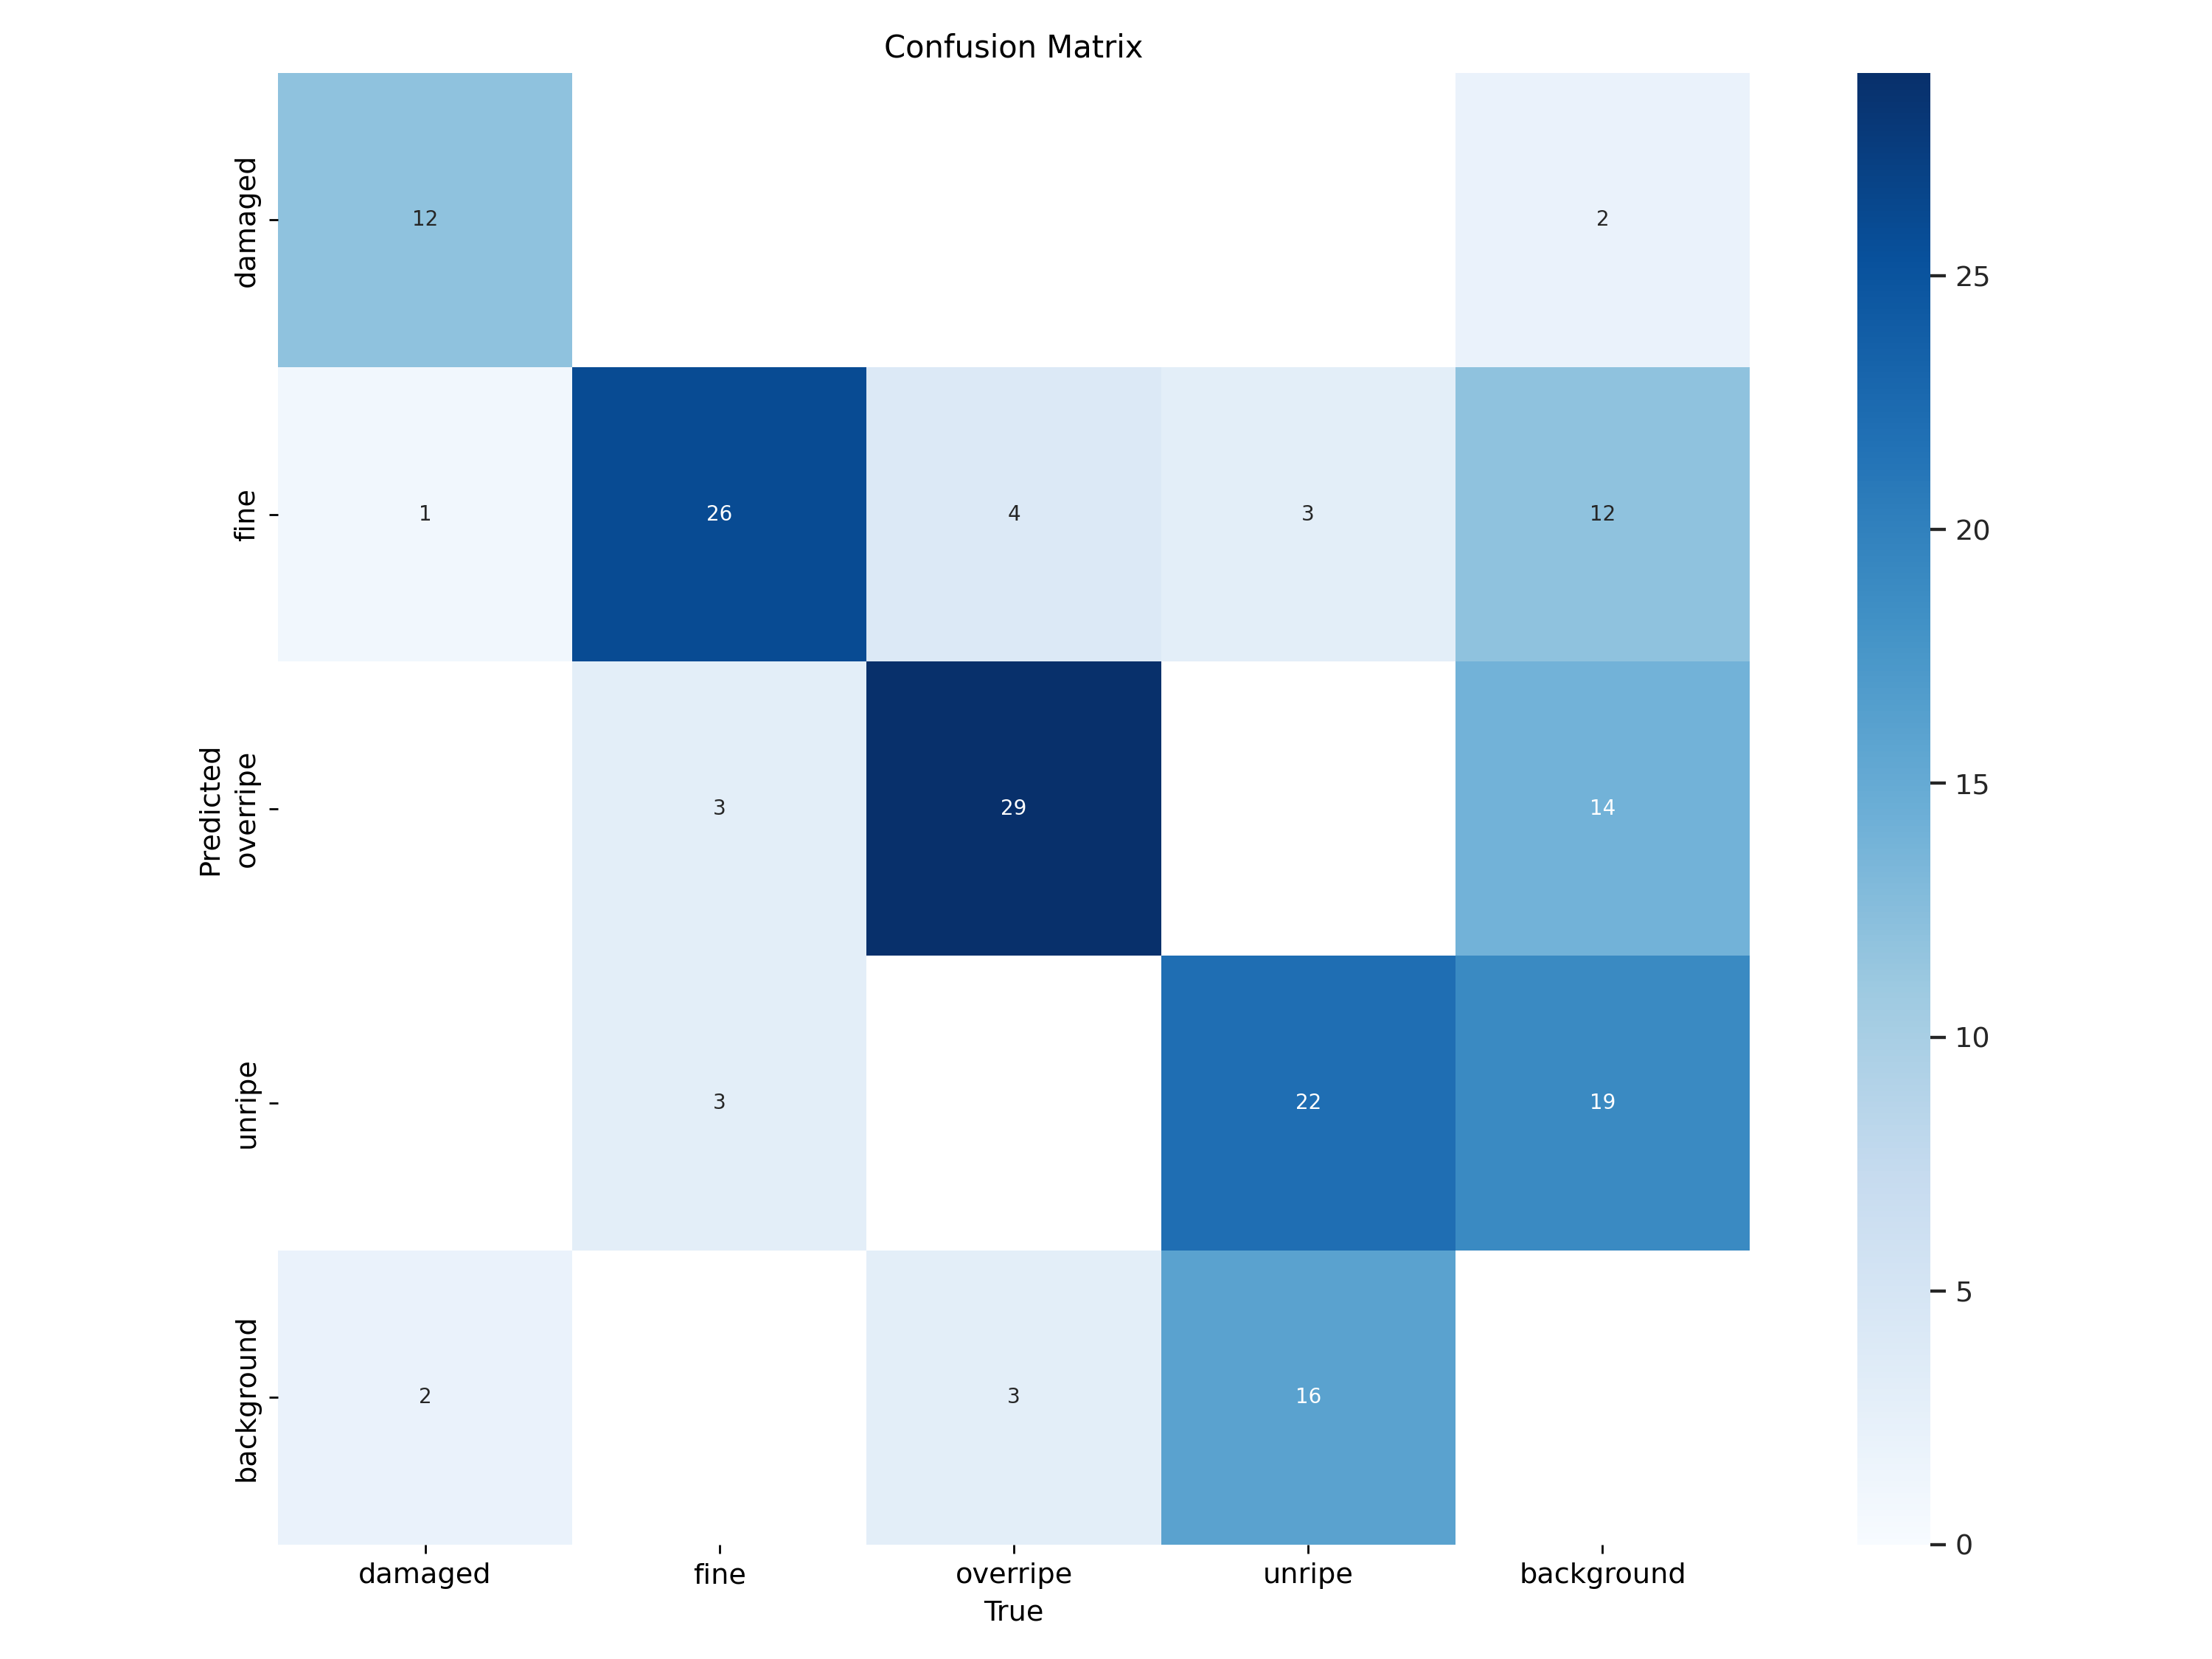

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


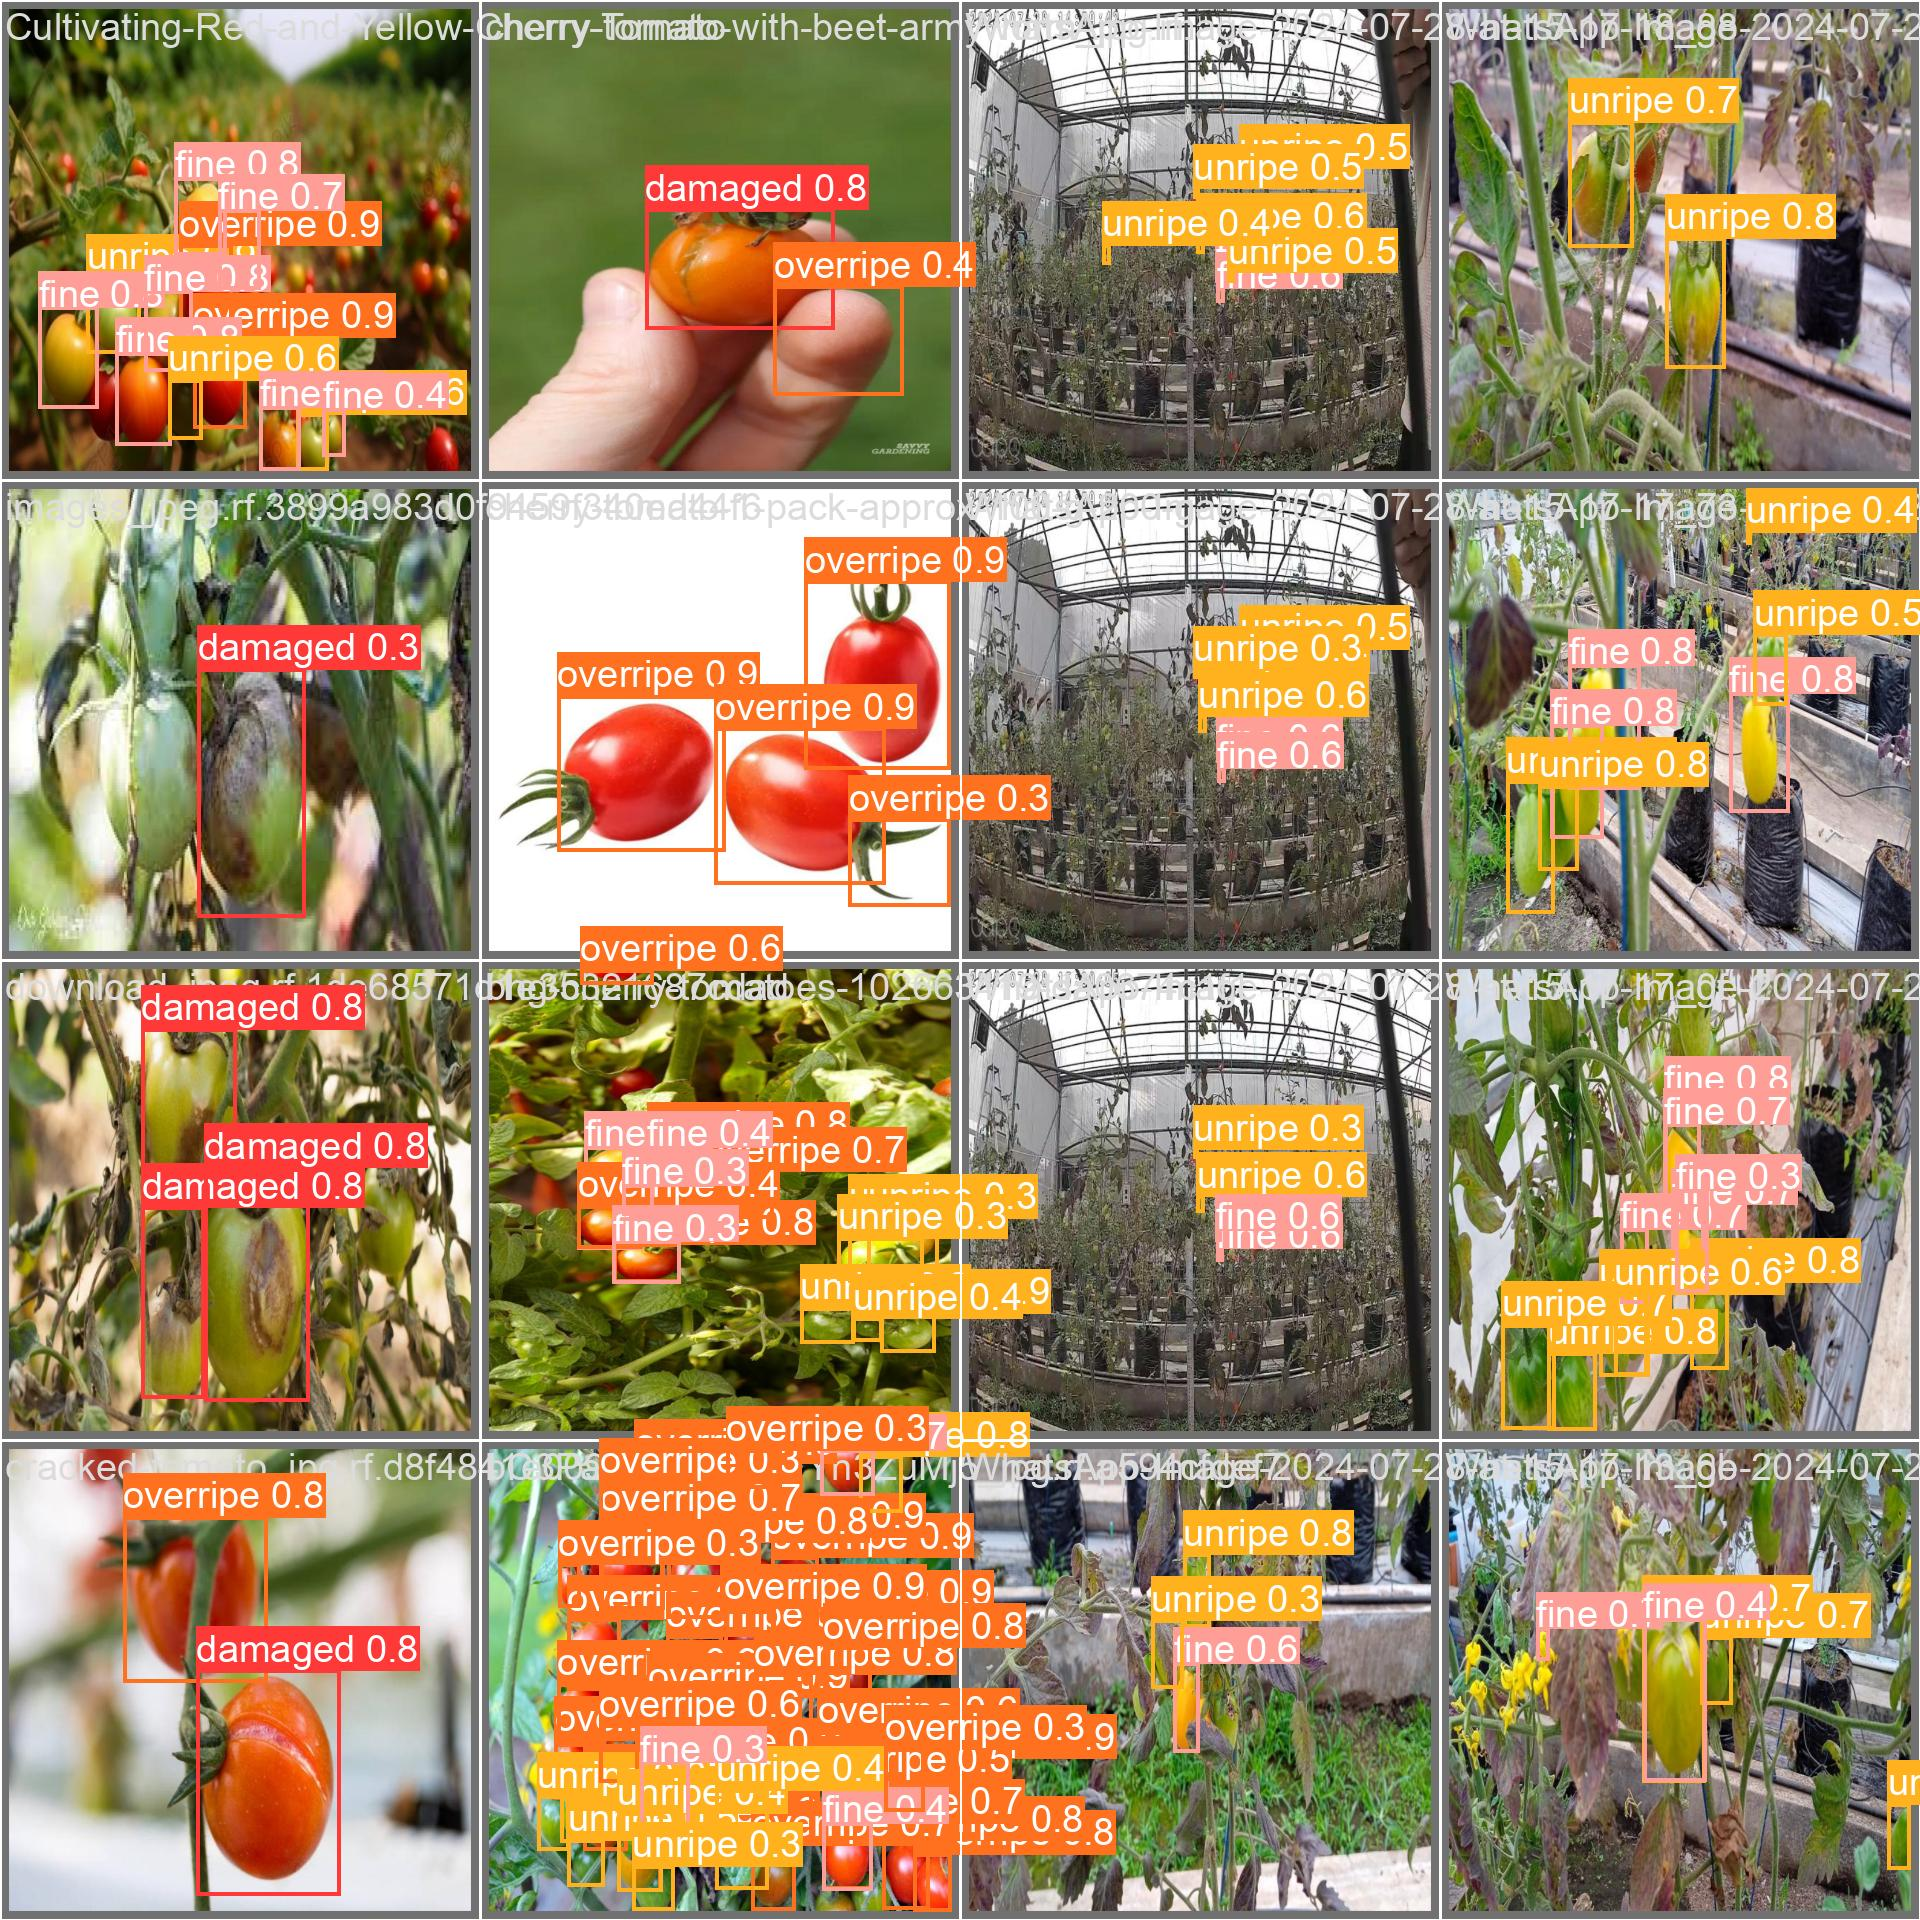

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/val_batch0_pred.jpg', width=600)

## **Model Validation**

In [ ]:
%cd {HOME}
!yolo task=detect mode=val model={HOME}/runs/detect/train2/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Quality-of-Cherry-Tomato-1/valid/labels.cache... 20 images, 1 backgrounds, 0 corrupt: 100% 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:01<00:00,  1.09it/s]
                   all         20        124      0.715      0.706      0.758      0.488
               damaged         20         15      0.838      0.689      0.881      0.576
                  fine         20         32      0.742      0.781      0.817      0.521
              overripe         20         36      0.709      0.889      0.899      0.622
                unripe         20         41       0.57      0.463      0.435      0.233
Speed: 0.4ms preprocess, 33.6ms inference, 0.0ms loss, 32.8ms postprocess per image
Results saved to runs/d

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/9 /content/datasets/Quality-of-Cherry-Tomato-1/test/images/384456140_jpg.rf.b24c27c26921817bad2864804f2db78a.jpg: 800x800 1 damaged, 22.5ms
image 2/9 /content/datasets/Quality-of-Cherry-Tomato-1/test/images/860_jpeg.rf.9d51a853254820fccf9e76ba3c07061a.jpg: 800x800 1 damaged, 3 fines, 11 overripes, 22.5ms
image 3/9 /content/datasets/Quality-of-Cherry-Tomato-1/test/images/Simply-Recipes-Split-Tomatoes-LEAD-e83b7c8b108541f489295091a930c7e9_jpg.rf.83ec2e631a72412e1d06dbf2b11728f4.jpg: 800x800 2 damageds, 22.4ms
image 4/9 /content/datasets/Quality-of-Cherry-Tomato-1/test/images/WhatsApp-Image-2024-07-28-at-15-16-48_e86d5f88_jpg.rf.7c95c3bf883fd252ad740db9d554de9a.jpg: 800x800 1 damaged, 2 fines, 22.4ms
image 5/9 /content/datasets/Quality-of-Cherry-Tomato-1/test/imag

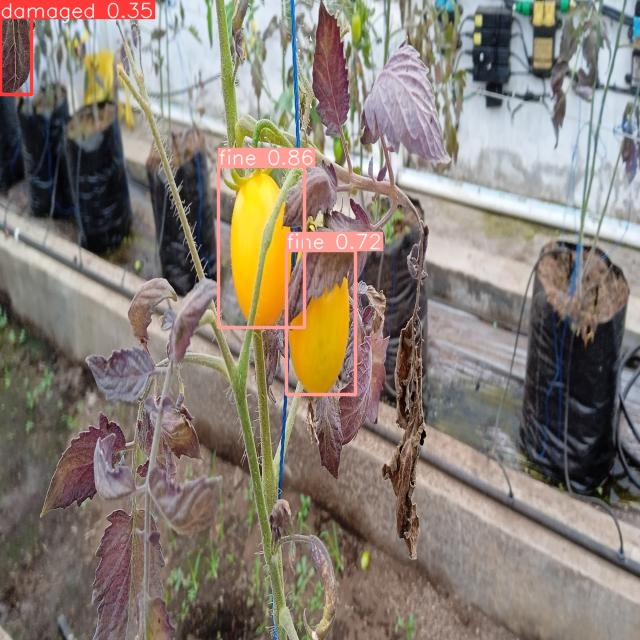

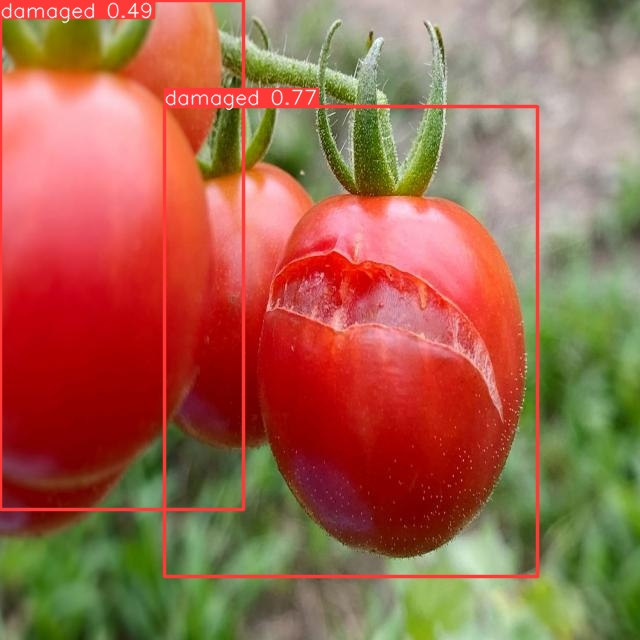

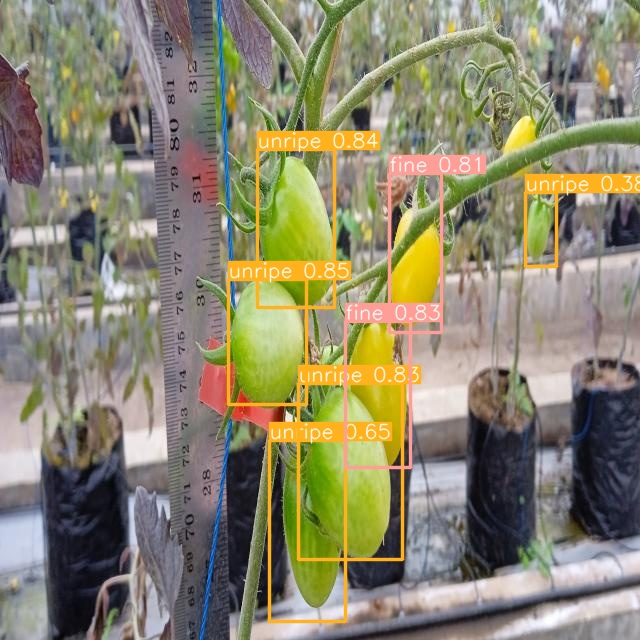

In [ ]:
import  glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict2/*.jpg')[:3]:
  display(Image(filename=image_path, width=600))
  print("\n")

## **Deploy Model**

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

In [ ]:
#Run inference on your model on a persistant, auto-scaling, cloud API

#load model
model = project.version(dataset.version).model

#choose random test set image
import os, random
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
pred